# Import of all pictures into a Pandas Dataframe

Import of libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
from skimage import color, io
from sklearn.model_selection import train_test_split
import cv2

## Data preparation
First count the number of pictures. Then put the paths for all pictures with the class and patient_id in a dataframe entry.

In [2]:
base_path = "data"
folder = os.listdir(base_path)
total_images = 0

#finding the number of total images
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = os.path.join(base_path, patient_id )
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        total_images += len(subfiles)

#DATAFRAME
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "class"])
k = 0
for n in range(len(folder)):
    #if folder[n] == 'IDC_regular_ps50_idx5':
    #    continue
    patient_id = folder[n]
    patient_path = os.path.join(base_path, patient_id )
    for c in [0,1]:
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            if image_path[-18:] == '.ipynb_checkpoints':
                continue
            data.iloc[k]["path"] = os.path.join(class_path, image_path)
            data.iloc[k]["class"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

In [3]:
#print(data.tail)
#print(data.loc[11124,'path'])
#print(data.loc[11124])
#plt.imshow(plt.imread(data.loc[11124,'path']))

In [4]:
#Creating a dataframe for each patient
for i in folder:
    if folder[n] == 'IDC_regular_ps50_idx5':
        continue
    df = data[data['patient_id'] == i]
    exec(f'data{i} = df')

In [5]:
#using train_test_split for splitting the data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=30)
print('########## Train data ##########')
print(train_data)
print('########## Test data ##########')
print(test_data)

########## Train data ##########
       patient_id                                            path class
167268      10300   data/10300/0/10300_idx5_x601_y1551_class0.png     0
25485       16014   data/16014/0/16014_idx5_x551_y1501_class0.png     0
242394      10299  data/10299/1/10299_idx5_x1901_y1051_class1.png     1
139916       8865     data/8865/0/8865_idx5_x1601_y351_class0.png     0
27823       10295   data/10295/0/10295_idx5_x301_y1101_class0.png     0
...           ...                                             ...   ...
3905        12242   data/12242/1/12242_idx5_x1351_y751_class1.png     1
108969      13458    data/13458/0/13458_idx5_x151_y951_class0.png     0
222339       9257     data/9257/0/9257_idx5_x3301_y851_class0.png     0
46220       13404  data/13404/1/13404_idx5_x2201_y1751_class1.png     1
48045       10282  data/10282/0/10282_idx5_x1901_y1151_class0.png     0

[194266 rows x 3 columns]
########## Test data ##########
       patient_id                           

In [6]:
#print(data.iloc[873])

test1
farger
Execution time: 219.10039448738098 seconds
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.8076  2.7112   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.0908  2.7464   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.2704  2.6620   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.2452  2.8940   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  2.5404  3.0032   
...                                                ...     ...     ...   
data/10295/1/10295_idx5_x1451_y1751_class1.png  2.4984  2.5208  2.3112   
data/10295/1/10295_idx5_x1251_y1751_class1.png  2.3984  2.4816  2.4340   
data/10295/1/10295_idx5_x1501_y1351_class1.png  2.3928  2.6456  2.5132   
data/10295/1/10295_idx5_x1501_y1601_class1.png  2.7404  2.3744  2.5352   
data/10295/1/10295_idx5_x1251_y1851_class1.png  2.3600  2.1736  2.9432   

                                                    gra

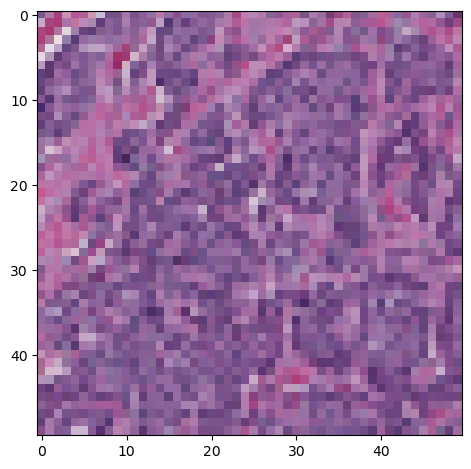

In [66]:
parameters_df = pd.DataFrame(columns = ['red', 'green', 'blue', 'gray', 'group'])
number_of_pix = 50*50

st = time.time()
patients = set()
i = 0
while True:
    #if data.loc[i,'path'][-18:] == '.ipynb_checkpoints':
    #    continue
    path_elements = data.loc[i,'path'].split('/')
    patient = path_elements[1]
    group = path_elements[2]
    patients.add(patient)
    if len(patients) == 31:
        print(f'farger')
        io.imshow(img)
        break
    img = io.imread(data.loc[i,'path'])
    imgGray = color.rgb2gray(img)
    red = sum(sum(img[:,:,0]))/number_of_pix
    green = sum(sum(img[:,:,1]))/number_of_pix
    blue = sum(sum(img[:,:,2]))/number_of_pix
    gray = sum(sum(imgGray[:,:]))/number_of_pix
    parameters_df.loc[data.loc[i,'path']] = [red,green,blue,gray,group]
    i += 1

patients.pop()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print(parameters_df)
print('Patients in DF:', patients)

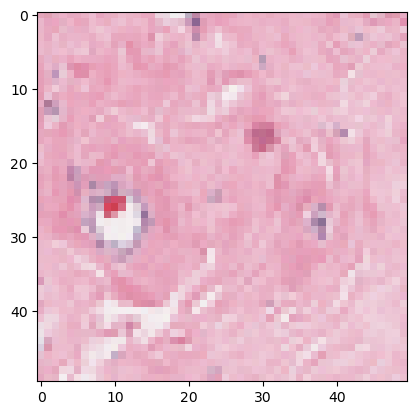

In [33]:
image = plt.imread(data.loc[0,'path'])
plt.imshow(image)

test1
farger


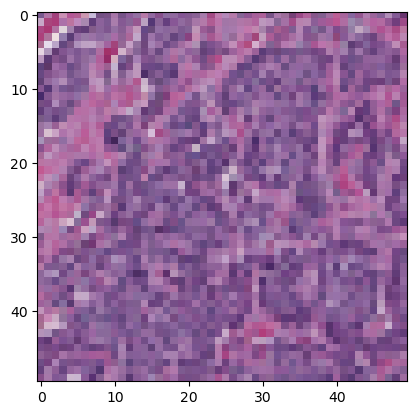

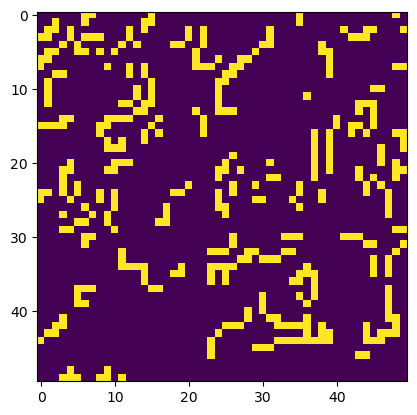

Execution time: 58.994322061538696 seconds
                                                   red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.8076  2.7112   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.0908  2.7464   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.2704  2.6620   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.2452  2.8940   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  2.5404  3.0032   
...                                                ...     ...     ...   
data/10295/1/10295_idx5_x1451_y1751_class1.png  2.4984  2.5208  2.3112   
data/10295/1/10295_idx5_x1251_y1751_class1.png  2.3984  2.4816  2.4340   
data/10295/1/10295_idx5_x1501_y1351_class1.png  2.3928  2.6456  2.5132   
data/10295/1/10295_idx5_x1501_y1601_class1.png  2.7404  2.3744  2.5352   
data/10295/1/10295_idx5_x1251_y1851_class1.png  2.3600  2.1736  2.9432   

                                                    gray group  edge

In [68]:
number_of_pix = 50*50
number_of_edges = []

st = time.time()
patients = set()
i = 0
print(f'test1')
while True:
    #if data.loc[i,'path'][-18:] == '.ipynb_checkpoints':
    #    continue
    path_elements = data.loc[i,'path'].split('/')
    patient = path_elements[1]
    group = path_elements[2]
    patients.add(patient)
    if len(patients) == 31:
    #if i >=2:
        print(f'farger')
        plt.imshow(img)
        plt.show()
        plt.imshow(edges)
        plt.show()
        break
    img = io.imread(data.loc[i,'path'])
    #image = plt.imread(data.loc[i,'path'])
    #imgGray = color.rgb2gray(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,180,250)
    edge_pieces = len(edges[np.where(edges == 255)])
    #print(edge_pieces)
    number_of_edges.append(edge_pieces)
    
    #parameters_df.loc[data.loc[i,'path']] = [red,green,blue,gray,group]
    i += 1
parameters_df['edges'] = number_of_edges
patients.pop()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print(parameters_df)
print('Patients in DF:', patients)

In [69]:
#Export dataframe to JSON file
parameters_df.to_json(r'parameters_df.json', orient='index')

In [70]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
imported_df = pd.read_json(jsonStr, orient ='index')
print(imported_df.tail)

<bound method NDFrame.tail of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.8076  2.7112   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.0908  2.7464   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.2704  2.6620   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.2452  2.8940   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  2.5404  3.0032   
...                                                ...     ...     ...   
data/10295/1/10295_idx5_x1451_y1751_class1.png  2.4984  2.5208  2.3112   
data/10295/1/10295_idx5_x1251_y1751_class1.png  2.3984  2.4816  2.4340   
data/10295/1/10295_idx5_x1501_y1351_class1.png  2.3928  2.6456  2.5132   
data/10295/1/10295_idx5_x1501_y1601_class1.png  2.7404  2.3744  2.5352   
data/10295/1/10295_idx5_x1251_y1851_class1.png  2.3600  2.1736  2.9432   

                                                    gray  group  edges  
data/129